In [1]:
import math
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage.util import img_as_ubyte

In [2]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

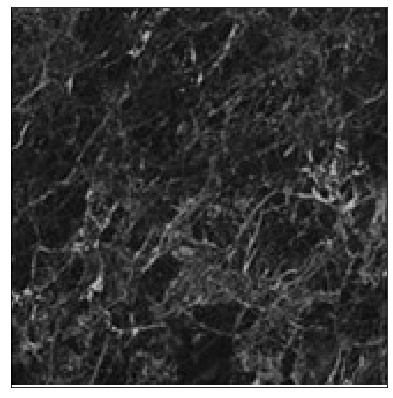

In [3]:
img_marmol = io.imread(fname="images/marmol.png",as_gray=True)
imshow(img_marmol)

Operadores Punto a Punto

Negativo

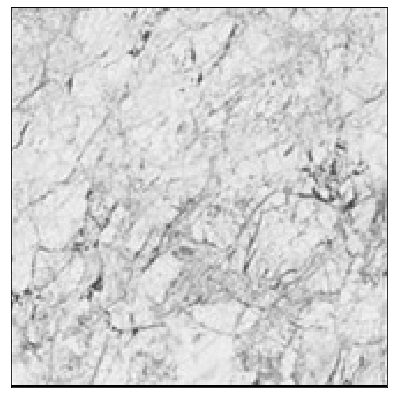

In [4]:
from skimage import util 
negative = util.invert(img_marmol)
imshow(negative)

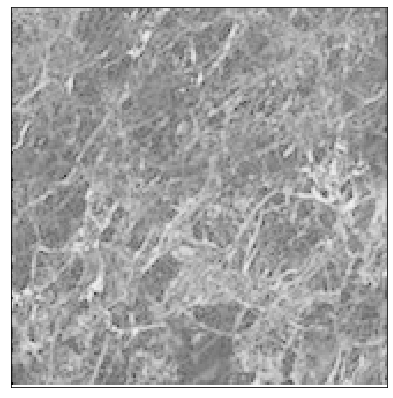

In [5]:
log = np.log(img_marmol)
imshow(log)

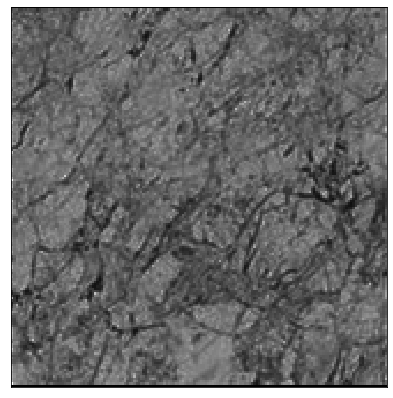

In [6]:
import numpy as np
base = 0.1
log = np.log(img_marmol) / np.log(base)
imshow(log)

Potencia
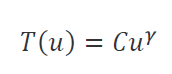

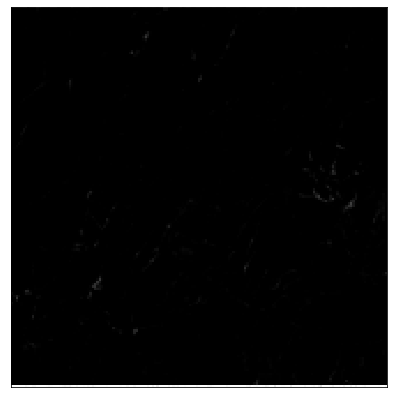

In [21]:
img_pot = np.power(img_marmol,5)
imshow(img_pot)

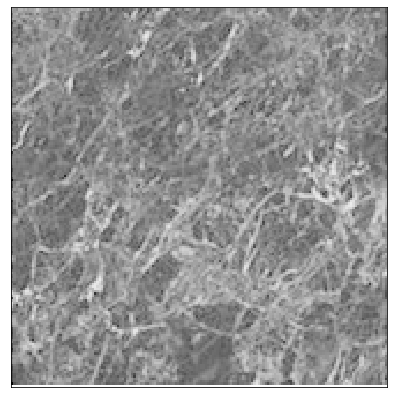

In [22]:
img_pot = pow(img_marmol,0.12)
imshow(img_pot)

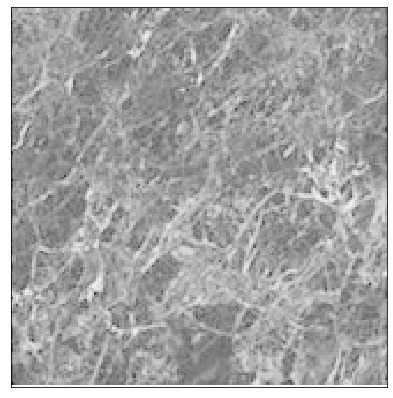

In [9]:
img_pot = pow(img_marmol,0.00012)
imshow(img_pot)

Ajuste basado en el histograma.

Probability Distribution Function (or PDF).

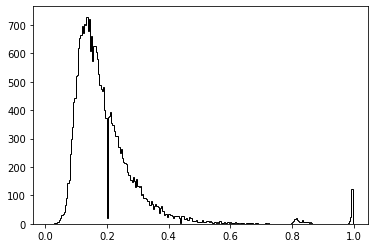

In [10]:
img_marmol = io.imread(fname="images/marmol.png",as_gray=True)
plt.hist(img_marmol.ravel(), bins=256, histtype='step', color='black')
plt.show()

CPF

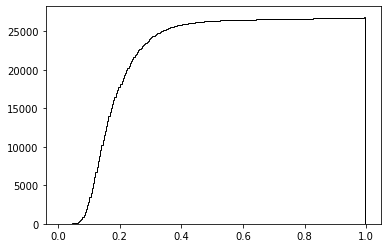

In [11]:
plt.hist(img_marmol.ravel(), bins=256, histtype='step', color='black',cumulative=True)
plt.show()

In [12]:
hist, bin_edges = np.histogram(img_marmol.ravel(),  density=True)


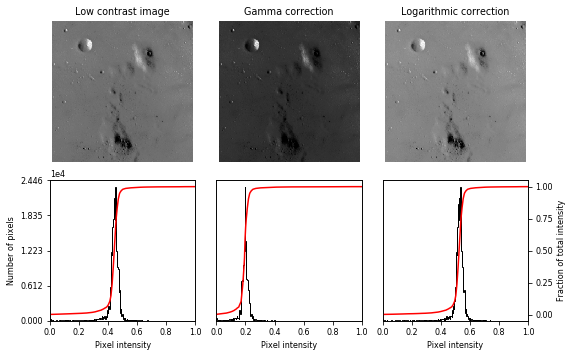

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

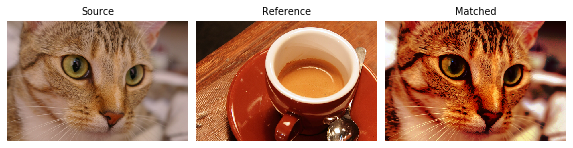

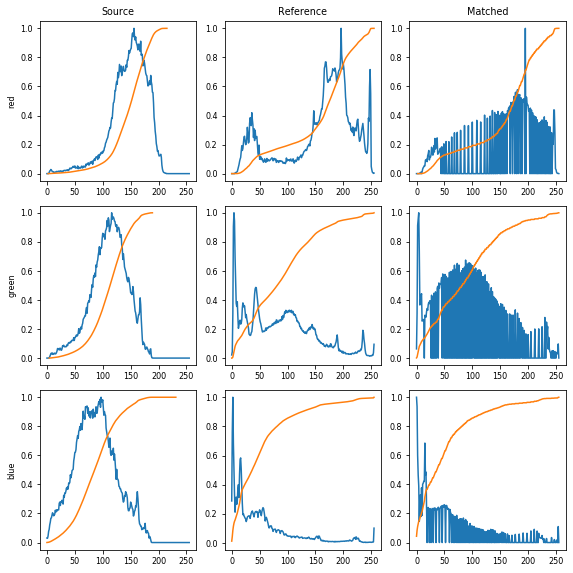

In [14]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

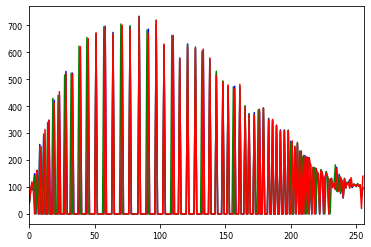

In [15]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("images/marmol.png")
###############
# Histogram Equalization
channels = cv2.split(image)
eq_channels = []
for ch, color in zip(channels, ['B', 'G', 'R']):
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)
cv2.namedWindow("Original", cv2.WINDOW_AUTOSIZE)
cv2.namedWindow("Equalized Image", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Original", image)
cv2.imshow("Equalized Image", eq_image)
cv2.waitKey()
cv2.destroyAllWindows()
############
# Plot histogram for equalized image
# show Histogram
channels = ('b', 'g', 'r')
# we now separate the colors and plot each in the Histogram
for i, color in enumerate(channels):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.show()